In [1]:
# Code to get all the Posterior mean (95% Equal-tail CI) (95% HPD CI) HPD-CI-width from ./xenarthra_mcmc_out.txt
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt


# Read the file
file = open("LG_G4_C60_cherry_out.txt", "r")
lines = file.readlines()
file.close()

# Extract the data
data = []
mu_data = []
var_data = []

read_flag = False
for line in lines:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data.append(line)
    if read_flag and line.startswith("mu"):
        mu_data.append(line)
    if read_flag and line.startswith("sigma"):
        var_data.append(line)

In [2]:
data

['t_n55         13.1100 (10.5910, 16.2347) (10.3636, 15.9635)  5.5999 (Jnode 106)\n',
 't_n56         12.7791 (10.3798, 15.6717) (10.2218, 15.4401)  5.2183 (Jnode 105)\n',
 't_n57         12.1204 ( 9.8665, 14.8112) ( 9.7029, 14.5784)  4.8755 (Jnode 104)\n',
 't_n58         10.4934 ( 8.5962, 12.7240) ( 8.4733, 12.5474)  4.0741 (Jnode 103)\n',
 't_n59         10.1964 ( 8.3494, 12.3453) ( 8.2618, 12.2121)  3.9503 (Jnode 102)\n',
 't_n60          9.7930 ( 8.0019, 11.8354) ( 7.9490, 11.7579)  3.8088 (Jnode 101)\n',
 't_n61          9.2031 ( 7.4515, 11.1176) ( 7.3649, 11.0128)  3.6479 (Jnode 100)\n',
 't_n62          4.8124 ( 2.6157,  6.3555) ( 2.7024,  6.4238)  3.7214 (Jnode 99)\n',
 't_n63          6.9677 ( 5.0965,  8.4891) ( 4.9908,  8.3529)  3.3621 (Jnode 98)\n',
 't_n64          5.3135 ( 3.4706,  6.6200) ( 3.3840,  6.5053)  3.1213 (Jnode 97)\n',
 't_n65          4.7481 ( 3.0082,  6.0066) ( 2.9211,  5.8813)  2.9602 (Jnode 96)\n',
 't_n66          3.7121 ( 2.2674,  4.9530) ( 2.1822,  4.80

In [3]:
node_name = []
posterior_mean_iqtree = []
posterior_mean_baseml = []

posterior_mean_mu_iqtree = []
posterior_mean_mu_baseml = []

posterior_mean_var_iqtree = []
posterior_mean_var_baseml = []

lower_ci_iqtree = []
upper_ci_iqtree = []

lower_ci_mu_iqtree = []
upper_ci_mu_iqtree = []

lower_ci_var_iqtree = []
upper_ci_var_iqtree = []

# Credible intervals for McmcDate
lower_ci_baseml = []
upper_ci_baseml = []

lower_ci_mu_baseml = []
upper_ci_mu_baseml = []

lower_ci_var_baseml = []
upper_ci_var_baseml = []

In [4]:
for line in data:
    line = line.strip().split()
    node_name.append(line[0])
    posterior_mean_iqtree.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     else:
#         lower_ci_iqtree.append(float(line[3][1:-1]))
#     if line[4].startswith('('):
#         upper_ci_iqtree.append(float(line[4][1:-1]))
#     else:
#         upper_ci_iqtree.append(float(line[4][:-1]))
#     # posterior_mean_baseml.append(float(line[4]))
#     # lower_ci_baseml.append(float(line[5]))
#     # upper_ci_baseml.append(float(line[6]))
# 
# for line in mu_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_iqtree.append(float(line[1]))
#     lower_ci_mu_iqtree.append(float(line[3][:-1]))
#     upper_ci_mu_iqtree.append(float(line[4][:-1]))
#
# for line in var_data:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_iqtree.append(float(line[1]))
#     lower_ci_var_iqtree.append(float(line[3][:-1]))
#     upper_ci_var_iqtree.append(float(line[4][:-1]))

In [5]:
node_name

['t_n55',
 't_n56',
 't_n57',
 't_n58',
 't_n59',
 't_n60',
 't_n61',
 't_n62',
 't_n63',
 't_n64',
 't_n65',
 't_n66',
 't_n67',
 't_n68',
 't_n69',
 't_n70',
 't_n71',
 't_n72',
 't_n73',
 't_n74',
 't_n75',
 't_n76',
 't_n77',
 't_n78',
 't_n79',
 't_n80',
 't_n81',
 't_n82',
 't_n83',
 't_n84',
 't_n85',
 't_n86',
 't_n87',
 't_n88',
 't_n89',
 't_n90',
 't_n91',
 't_n92',
 't_n93',
 't_n94',
 't_n95',
 't_n96',
 't_n97',
 't_n98',
 't_n99',
 't_n100',
 't_n101',
 't_n102',
 't_n103',
 't_n104',
 't_n105',
 't_n106',
 't_n107']

In [6]:
posterior_mean_iqtree

[13.11,
 12.7791,
 12.1204,
 10.4934,
 10.1964,
 9.793,
 9.2031,
 4.8124,
 6.9677,
 5.3135,
 4.7481,
 3.7121,
 2.4985,
 1.6514,
 0.7121,
 5.4014,
 9.9772,
 9.7026,
 9.1143,
 6.5531,
 5.8925,
 5.5278,
 9.6308,
 9.1988,
 8.9129,
 8.3867,
 7.7548,
 7.5637,
 6.6616,
 6.1182,
 5.6498,
 4.311,
 4.0019,
 6.6975,
 5.4993,
 9.4491,
 1.8843,
 9.2319,
 8.585,
 7.4155,
 6.7452,
 4.8656,
 5.0383,
 7.3005,
 7.0436,
 6.5693,
 4.9657,
 6.3286,
 11.0841,
 8.4864,
 5.5329,
 4.7071,
 8.6534]

In [7]:
lower_ci_iqtree

[]

In [8]:
upper_ci_iqtree

[]

In [9]:
file_LG = open("LG_cherry_out.txt", "r")
lines1 = file_LG.readlines()
file_LG.close()

# Extract the data
data1 = []
mu_data1 = []
var_data1 = []

read_flag = False
for line in lines1:
    if line.startswith("Posterior"):
        read_flag = True
    if read_flag and line.startswith("t"):
        data1.append(line)
    if read_flag and line.startswith("mu"):
        mu_data1.append(line)
    if read_flag and line.startswith("sigma"):
        var_data1.append(line)

        
for line in data1:
    line = line.strip().split()
    # node_name.append(line[0])
    posterior_mean_baseml.append(float(line[1]))
#     if line[3].startswith('('):
#         lower_ci_baseml.append(float(line[3][1:-1]))
#     else:
#          lower_ci_baseml.append(float(line[3][:-1]))
#     if line[4].startswith('('):
#         upper_ci_baseml.append(float(line[4][1:-1]))
#     else:
#          upper_ci_baseml.append(float(line[4][:-1]))
#         
#     
# for line in mu_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_mu_baseml.append(float(line[1]))
#     lower_ci_mu_baseml.append(float(line[3][:-1]))
#     upper_ci_mu_baseml.append(float(line[4][:-1]))
    
# for line in var_data1:
#     line = line.strip().split()
#     # node_name.append(line[0])
#     posterior_mean_var_baseml.append(float(line[1]))
#     lower_ci_var_baseml.append(float(line[3][:-1]))
#     upper_ci_var_baseml.append(float(line[4][:-1]))

In [10]:
import matplotlib.pyplot as plt
import numpy as np

# # Example data
# # Posterior means for MCMCtree (x-axis) and McmcDate (y-axis)
# posterior_mean_mcmctree = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# posterior_mean_mcmcdate = [110, 210, 310, 410, 510, 610, 710, 810, 910, 1010]
# 
# # Credible intervals for MCMCtree
# lower_ci_mcmctree = [90, 180, 270, 360, 450, 540, 630, 720, 810, 900]
# upper_ci_mcmctree = [110, 220, 330, 440, 550, 660, 770, 880, 990, 1100]
# 
# # Credible intervals for McmcDate
# lower_ci_mcmcdate = [100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
# upper_ci_mcmcdate = [120, 220, 320, 420, 520, 620, 720, 820, 920, 1020]

# Calculate error bars
# xerr = [np.array(lower_ci_baseml), 
#         np.array(upper_ci_baseml)]
# yerr = [np.array(lower_ci_iqtree), 
#         np.array(upper_ci_iqtree)]
# 
# # Plotting
# fig, ax = plt.subplots(figsize=(15, 15))
# ax.plot([-0.1,90], 
#         [-0.1, 90], 
#         'k--', label='y=x')
# ax.errorbar(posterior_mean_baseml, posterior_mean_iqtree, 
#             xerr=xerr, yerr=yerr, fmt='*', ecolor='r', capsize=3, label='95% HPD CI')
# 
# # Labels and title
# ax.set_xlabel('Posterior mean age LG [100 Mya]', fontsize=18)
# ax.set_ylabel('Posterior mean age LG+G4 [100 Mya]', fontsize=18)
# ax.set_title('Posterior mean age comparison between LG and LG+G4 models [t116 ~ B(1.25,2.482)]')
# ax.legend()
# 
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin_posterior_mean_age_comparison_LG_G4_c11.png')

In [11]:
posterior_mean_baseml

[16.5667,
 16.1345,
 14.4413,
 12.2428,
 11.611,
 10.8731,
 9.8583,
 5.3799,
 7.4229,
 5.519,
 4.7046,
 3.5508,
 2.3471,
 1.5474,
 0.6618,
 5.6592,
 10.9607,
 9.0003,
 9.7308,
 6.9798,
 5.9305,
 5.8451,
 10.9792,
 10.1824,
 9.6398,
 8.9734,
 8.1547,
 7.7356,
 6.6394,
 5.9023,
 5.2159,
 3.9015,
 3.3153,
 6.8826,
 5.4406,
 10.5664,
 2.7444,
 10.1068,
 9.1805,
 7.816,
 6.902,
 5.0609,
 5.0191,
 7.6693,
 6.9943,
 5.9235,
 5.2832,
 6.5884,
 12.7896,
 9.5804,
 5.9691,
 5.7771,
 11.8514]

In [12]:
posterior_mean_iqtree

[13.11,
 12.7791,
 12.1204,
 10.4934,
 10.1964,
 9.793,
 9.2031,
 4.8124,
 6.9677,
 5.3135,
 4.7481,
 3.7121,
 2.4985,
 1.6514,
 0.7121,
 5.4014,
 9.9772,
 9.7026,
 9.1143,
 6.5531,
 5.8925,
 5.5278,
 9.6308,
 9.1988,
 8.9129,
 8.3867,
 7.7548,
 7.5637,
 6.6616,
 6.1182,
 5.6498,
 4.311,
 4.0019,
 6.6975,
 5.4993,
 9.4491,
 1.8843,
 9.2319,
 8.585,
 7.4155,
 6.7452,
 4.8656,
 5.0383,
 7.3005,
 7.0436,
 6.5693,
 4.9657,
 6.3286,
 11.0841,
 8.4864,
 5.5329,
 4.7071,
 8.6534]

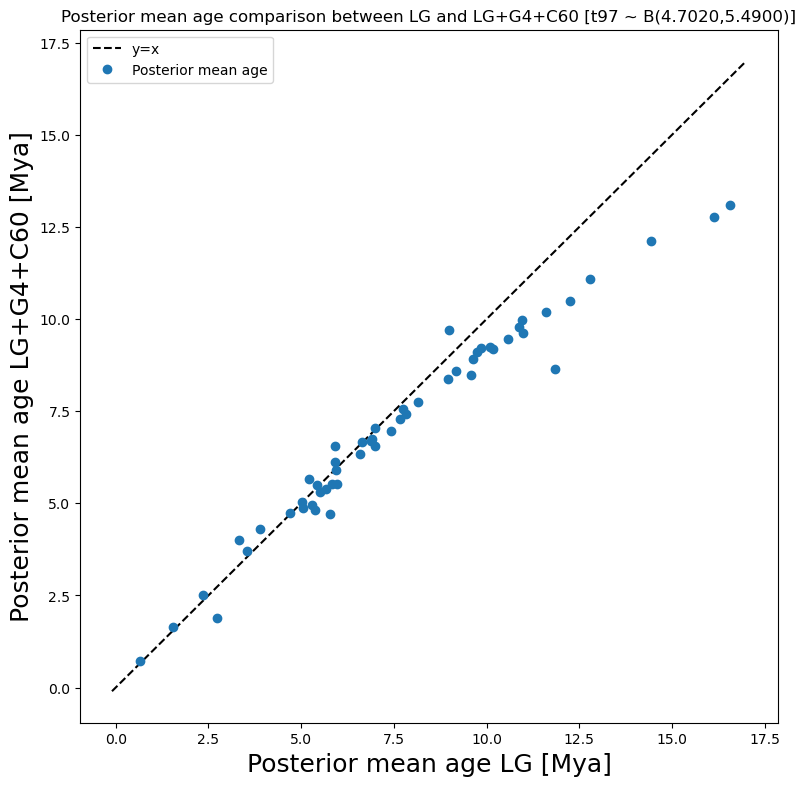

In [13]:
# Calculate error bars
xerr = [np.array(lower_ci_baseml), 
        np.array(upper_ci_baseml)]
yerr = [np.array(lower_ci_iqtree), 
        np.array(upper_ci_iqtree)]

# Plotting
fig, ax = plt.subplots(figsize=(9 ,9))
ax.plot([-0.1,17], 
        [-0.1, 17], 
        'k--', label='y=x')
ax.plot(posterior_mean_baseml, posterior_mean_iqtree, 'o', label='Posterior mean age')
 
# Labels and title
ax.set_xlabel('Posterior mean age LG [Mya]', fontsize=18)
ax.set_ylabel('Posterior mean age LG+G4+C60 [Mya]', fontsize=18)
ax.set_title('Posterior mean age comparison between LG and LG+G4+C60 [t97 ~ B(4.7020,5.4900)]')
ax.legend()

# point_x = posterior_mean_baseml[0]  # Example: first point in the list
# point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# Show plot
# plt.show()
plt.savefig('./metazoa_posterior_mean_age_comparison_LG_G4_C60_cherry_scatter.png')

In [14]:
# fig, ax = plt.subplots(figsize=(9 ,9))
# ax.plot([0.01,0.04], 
#         [0.01, 0.04], 
#         'k--', label='y=x')
# ax.plot(posterior_mean_mu_baseml, posterior_mean_mu_iqtree, 'o', label='Posterior mean rates for partitions')
#  
# # Labels and title
# ax.set_xlabel('Posterior mean rate [LG]', fontsize=18)
# ax.set_ylabel('Posterior mean rate [LG+G4]', fontsize=18)
# ax.set_title('Posterior mean rate comparison between LG and LG+G4 [Cherry only calibration/IQ-TREE]')
# ax.legend()
# 
# # point_x = posterior_mean_baseml[0]  # Example: first point in the list
# # point_y = posterior_mean_iqtree[0]  # Example: first point in the list
# # ax.annotate('Root age', xy=(point_x, point_y), xytext=(point_x - 0.1, point_y - 0.1), color='red')
# # Show plot
# # plt.show()
# plt.savefig('./animal_origin__posterior_mean_rate_comparison_LG_G4_all_scatter.png')